Which State? Michigan
 
 
 
 
 


<IPython.core.display.Javascript object>


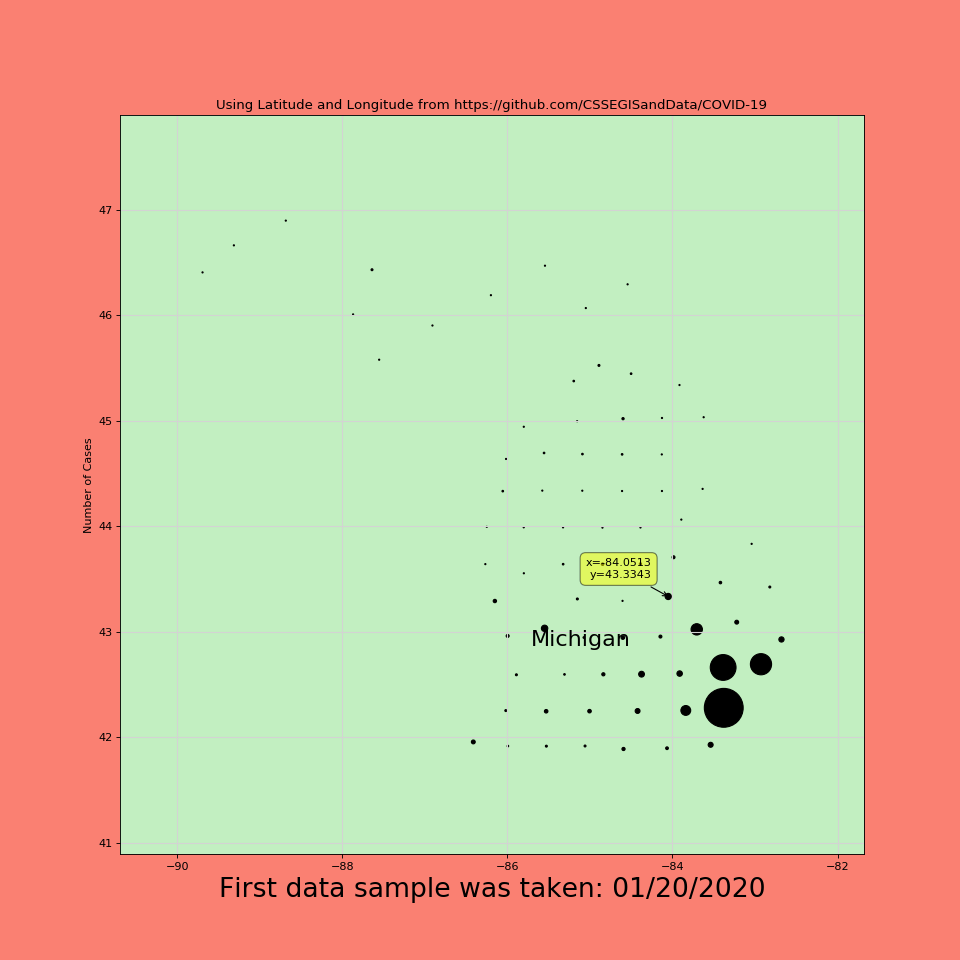

Text(0.62, 0.29, 'Michigan')

Textarea(value='', description='event:', placeholder='')

[-92.69377193, -79.67937954, 38.88753639, 49.89988536]

[-90.69377193, -81.67937954, 40.88753639, 47.89988536]

Text(0.5, 0, 'First data sample was taken: 01/20/2020')

Text(0.5, 1.0, 'Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')

Text(0, 0.5, 'Number of Cases')

In [150]:
%matplotlib notebook
import mplcursors
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
from PIL import Image
import ipywidgets as wdg 
LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-14-2020.csv"

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []

STate = input("Which State? ")
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-1
B =(max(LG))+1
C =(min(LT))-1
D =(max(LT))+1


longLeft= (min(LG))-3
longRight = (max(LG))+3
lat1 = (min(LT))-3
lat2 = (max(LT))+3

ax = fig.gca()
T= STate
text(0.62, 0.29, T, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20)

# Create and display textarea widget
txt = wdg.Textarea(
    value='',
    placeholder='',
    description='event:',
    disabled=False
)
display(txt)
COORD=[]
COORD.append(txt)
# Define a callback function that will update the textarea
def onclick(event):
    txt.value = str(event)  # Dynamically update the text box above

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

plt.axis([longLeft,longRight,lat1,lat2])
plt.axis([A,B,C,D])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")


plt.xlabel('First data sample was taken: 01/20/2020', fontsize=24)
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
mplcursors.cursor(hover=True)

plt.show()

In [151]:
import reverse_geocoder as rg 
import pprint 
def Reverse(tuples): 
    new_tup = tuples[::-1] 
    return new_tup   
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result)  

for line in COORD:
    coordinates = ((str(line).split('xydata=('))[1].split(') button=1')[0])
    res = tuple(map(float, coordinates.split(', ')))
    dat = Reverse(res)
    reverseGeocode(dat)

[OrderedDict([('lat', '43.4153'),
              ('lon', '-84.05637'),
              ('name', 'Shields'),
              ('admin1', 'Michigan'),
              ('admin2', 'Saginaw County'),
              ('cc', 'US')])]


In [117]:
#COORD=[]
#COORD.append(txt)

print(COORD)
#xydata=(  ) button=1

for line in COORD:
    coordinates = ((line.split('xydata=('))[1].split(') button=1')[0])


[Textarea(value='button_press_event: xy=(258, 336) xydata=(-84.54645894452702, 39.19144800795269) button=1 dblclick=False inaxes=AxesSubplot(0.125,0.11;0.775x0.77)', description='event:', placeholder='')]
Textarea(value='button_press_event: xy=(258, 336) xydata=(-84.54645894452702, 39.19144800795269) button=1 dblclick=False inaxes=AxesSubplot(0.125,0.11;0.775x0.77)', description='event:', placeholder='')


In [121]:
TXT="""Textarea(value='button_press_event: xy=(258, 336) xydata=(-84.54645894452702, 39.19144800795269) button=1 dblclick=False inaxes=AxesSubplot(0.125,0.11;0.775x0.77)', description='event:', placeholder='')"""
#OUTPUT = str(TXT).split("#xydata=(",0).split(") button=1",0)
#print(OUTPUT)

In [133]:
#start = 'xydata=('
#end = ') button=1'
coordinates = ((TXT.split('xydata=('))[1].split(') button=1')[0])
print(stats)

-84.54645894452702, 39.19144800795269


In [132]:
start = 'xydata=('
end = ') button=1'
stats = ((TXT.split(start))[1].split(end)[0])
print(stats)

-84.54645894452702, 39.19144800795269


In [142]:
import reverse_geocoder as rg 
import pprint 
  
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result)  

for line in COORD:
    coordinates = ((str(line).split('xydata=('))[1].split(') button=1')[0])
    deg=coordinates.split(", ")
    print(deg[0]+","+deg[1])
    reverseGeocode(deg[0]+", "+deg[1])  

-84.54645894452702,39.19144800795269


TypeError: Expecting a tuple or a tuple/list of tuples

In [115]:
import reverse_geocoder as rg 
import pprint 
  
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result)  

LatLong =input("LatLong: ")
LatLong=LatLong.split(",")
print(LatLong[0],LatLong[1])
lat=LatLong[1]
lng=LatLong[0]

coordinates =(lat,lng) 
     
reverseGeocode(coordinates)  

LatLong: -84.54645894452702, 39.19144800795269
-84.54645894452702  39.19144800795269
[OrderedDict([('lat', '39.21839'),
              ('lon', '-84.55078'),
              ('name', 'North College Hill'),
              ('admin1', 'Ohio'),
              ('admin2', 'Hamilton County'),
              ('cc', 'US')])]


# Get the Latitude and Longitude from a Plot

In [ ]:
https://simplemaps.com/data/us-cities

In [ ]:
-80.4875 26.1815

Which State? Florida
 
 
 
 
 


<IPython.core.display.Javascript object>


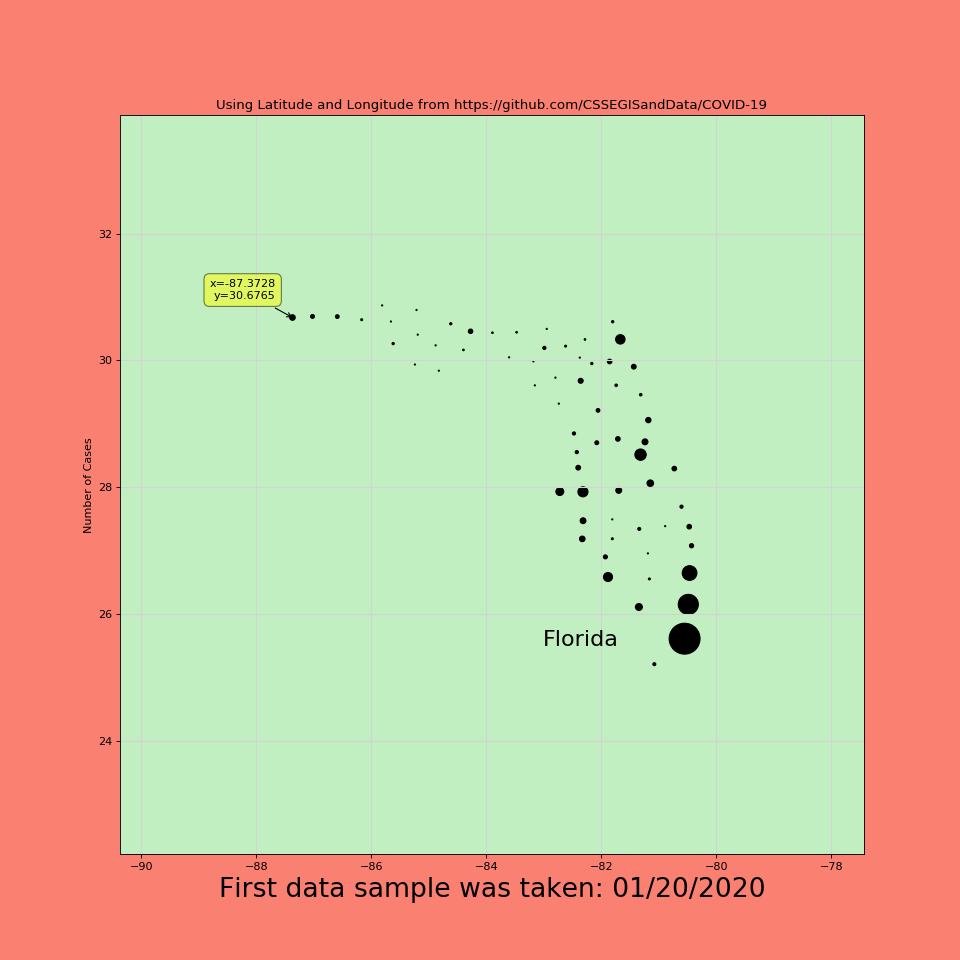

Text(0.62, 0.29, 'Florida')

[-90.37284571, -77.43109784, 22.20904673, 33.86747479]

Text(0.5, 0, 'First data sample was taken: 01/20/2020')

Text(0.5, 1.0, 'Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')

Text(0, 0.5, 'Number of Cases')

In [87]:
%matplotlib notebook
import mplcursors
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
from PIL import Image

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-14-2020.csv"

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []

STate = input("Which State? ")
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

fig = plt.figure(num=None, figsize=(12,12), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-1
B =(max(LG))+1
C =(min(LT))-1
D =(max(LT))+1


longLeft= (min(LG))-3
longRight = (max(LG))+3
lat1 = (min(LT))-3
lat2 = (max(LT))+3

ax = fig.gca()
T= STate
text(0.62, 0.29, T, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes, fontsize=20)

plt.axis([longLeft,longRight,lat1,lat2])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")


plt.xlabel('First data sample was taken: 01/20/2020', fontsize=24)
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
mplcursors.cursor(hover=True)

plt.show()

Which State? Maine
 
 
 
 
 


<IPython.core.display.Javascript object>


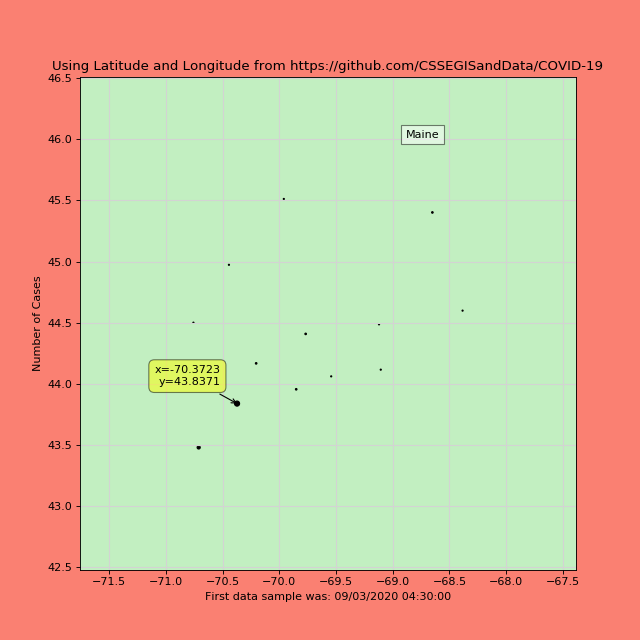

-68.88401854 46.01229767


Text(-68.88401854, 46.01229767, 'Maine')

[-71.75682123, -67.38401854, 42.47808377, 46.51229767]

Text(0.5, 0, 'First data sample was: 09/03/2020 04:30:00')

Text(0.5, 1.0, 'Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')

Text(0, 0.5, 'Number of Cases')

In [28]:
%matplotlib notebook
import mplcursors
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
from mpld3 import plugins
from PIL import Image

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
STate = input("Which State? ")
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-1
B =(max(LG))+1
C =(min(LT))-1
D =(max(LT))+1

ax = fig.gca()
tx = max(LG)-.5
ty = max(LT)+.5

print(tx,ty)
text(tx, ty, STate, bbox=dict(facecolor='white', alpha=0.5))


plt.axis([A,B,C,D])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
mplcursors.cursor(hover=True)

plt.show()

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import mplcursors


#fig, ax = plt.subplots()
fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")



#ax.scatter(LG, LT)
#ax.set_title("Mouse over a point")

mplcursors.cursor(hover=True)

plt.show()


In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
%matplotlib inline  
from mpld3 import plugins
from PIL import Image
img=Image.open("mouse-sizing-n-cropping-files/soil600.jpg")

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
STate = 'Florida'
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

#fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-3
B =(max(LG))+3
C =(min(LT))-3
D =(max(LT))+3
#fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
#fig, ax = plt.subplots(figsize=(8,8), dpi=80, facecolor='salmon')
#im = ax.imshow(img, extent=(A, B, C, D),
#               origin='upper', zorder=0, interpolation='nearest')
#plugins.connect(fig, plugins.MousePosition(fontsize=14))
#mpld3.display()

ax = fig.gca()
T= 'Miami-Dade'
text(0.62, 0.29, T, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.axis([A, B, C, D])
#plugins.connect(ax, plugins.MousePosition(fontsize=14))

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")
fig, ax = plt.subplots(figsize=(8,8), dpi=80, facecolor='salmon')
plugins.connect(fig, plugins.MousePosition(fontsize=14))
im = ax.imshow(img, extent=(A, B, C, D),
               origin='upper', zorder=0, interpolation='nearest')

mpld3.display()

plt.show()
#from PIL import Image
#im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))
#plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()



In [ ]:
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
%matplotlib inline  
from mpld3 import plugins
from PIL import Image
img=Image.open("mouse-sizing-n-cropping-files/soil600.jpg")

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
STate = 'Florida'
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

#fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-3
B =(max(LG))+3
C =(min(LT))-3
D =(max(LT))+3
#fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
fig, ax = plt.subplots(figsize=(8,8), dpi=80, facecolor='salmon')
im = ax.imshow(img, extent=(A, B, C, D),
               origin='upper', zorder=0, interpolation='nearest')
plugins.connect(fig, plugins.MousePosition(fontsize=14))

longLeft= (min(LG))-3
longRight = (max(LG))+3
lat1 = (min(LT))-3
lat2 = (max(LT))+3

ax = fig.gca()
T= 'Miami-Dade'
text(0.62, 0.29, T, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.axis([longLeft,longRight,lat1,lat2])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")

#im = ax.imshow(img, extent=(A, B, C, D),
#               origin='lower', zorder=1, interpolation='nearest')

plt.xlabel('First data sample was: 09/03/2020 04:30:00')
plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
plt.ylabel('Number of Cases')
plt.show()

plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()



In [ ]:
from matplotlib.pyplot import text
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
%matplotlib inline  
from mpld3 import plugins
from PIL import Image
img=Image.open("mouse-sizing-n-cropping-files/soil600.jpg")

LASTFILE="COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-02-2020.csv"
#im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))

DataIn = open(LASTFILE).readlines()
cnt=-1
LAT =[]
LON =[]
cases = []
STate = 'Florida'
for lines in DataIn:
    lines = lines.replace("\n","")
    line = lines.split(",")
    if STate in line[2] and len(line[5])>8 and len(line[6])>4:
        cnt=cnt+1
        if cnt<5:
            print(" ")
            #print(line[1],line[2],line[3],line[4],line[5],line[6],line[7],line[8])
        LAT.append(line[5]) 
        LON.append(line[6])
        cases.append(int(line[7]))
LA = LAT
LO = LON
LT = np.array(LAT,dtype=np.float)
LG = np.array(LON,dtype=np.float)

#fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
ax = fig.gca()
ax.set_facecolor(('#c2efc1'))

S=1
Size=[]
for x in cases:
    S=1+(float(x)*.1)
    Size.append(int(S))
    #print(int(S))
s = np.array(Size)

A =(min(LG))-3
B =(max(LG))+3
C =(min(LT))-3
D =(max(LT))+3
#fig = plt.figure(num=None, figsize=(8,8), dpi=80, facecolor='salmon')
fig, ax = plt.subplots(figsize=(8,8), dpi=80, facecolor='salmon')
im = ax.imshow(img, extent=(A, B, C, D),
               origin='upper', zorder=0, interpolation='nearest')
plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()

ax = fig.gca()
T= 'Miami-Dade'
text(0.62, 0.29, T, horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

plt.axis([A, B, C, D])

ax.grid(color='lightgray', linestyle='-', linewidth=1)
plt.grid(True)
plt.scatter(LG, LT, s=s, color="black")

#im = ax.imshow(img, extent=(A, B, C, D),
#               origin='lower', zorder=1, interpolation='nearest')

#plt.xlabel('First data sample was: 09/03/2020 04:30:00')
#plt.title('Using Latitude and Longitude from https://github.com/CSSEGISandData/COVID-19')
#plt.ylabel('Number of Cases')
plt.show()
from PIL import Image
im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()



In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import matplotlib.pyplot as plt
import numpy as np
import mpld3
%matplotlib inline  
from mpld3 import plugins
from PIL import Image
img=Image.open("mouse-sizing-n-cropping-files/soil600.jpg")
 

fig, ax = plt.subplots()
im = ax.imshow(img, extent=(10, 20, 10, 20),
               origin='upper', zorder=1, interpolation='nearest')

plugins.connect(fig, plugins.MousePosition(fontsize=14))
mpld3.display()
from PIL import Image
im = np.array(Image.open('mouse-sizing-n-cropping-files/soil600.jpg'))
plt.show()
plugins.connect(fig, plugins.MousePosition(fontsize=14))

mpld3.display()


In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import mplcursors
np.random.seed(42)

fig, ax = plt.subplots()
ax.scatter(*np.random.random((2, 26)))
ax.set_title("Mouse over a point")

mplcursors.cursor(hover=True)

plt.show()


In [ ]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

company=['google','amazon','msft','fb']
revenue=[80,68,54,27]

fig=plt.figure()
ax=plt.subplot()

xpos=np.arange(len(company))

bars = plt.bar(xpos,revenue)


annot = ax.annotate("", xy=(0,0), xytext=(-20,20),textcoords="offset points",
                    bbox=dict(boxstyle="round", fc="black", ec="b", lw=2),
                    arrowprops=dict(arrowstyle="->"))
annot.set_visible(False)

def update_annot(bar):
    x = bar.get_x()+bar.get_width()/2.
    y = bar.get_y()+bar.get_height()
    annot.xy = (x,y)
    text = "({:.2g},{:.2g})".format( x,y )
    annot.set_text(text)
    annot.get_bbox_patch().set_alpha(0.4)


def hover(event):
    vis = annot.get_visible()
    if event.inaxes == ax:
        for bar in bars:
            cont, ind = bar.contains(event)
            if cont:
                update_annot(bar)
                annot.set_visible(True)
                fig.canvas.draw_idle()
                return
    if vis:
        annot.set_visible(False)
        fig.canvas.draw_idle()

fig.canvas.mpl_connect("motion_notify_event", hover)

plt.show()

In [ ]:
import mplcursors
help(mplcursors)

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


def plot_unit_circle():
    angs = np.linspace(0, 2 * np.pi, 10**6)
    rs = np.zeros_like(angs) + 1
    xs = rs * np.cos(angs)
    ys = rs * np.sin(angs)
    plt.plot(xs, ys)


def mouse_move(event):
    x, y = event.xdata, event.ydata
    print(x, y)


plt.connect('motion_notify_event', mouse_move)
plot_unit_circle()
plt.axis('equal')
plt.show()

In [ ]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as wdg  # Using the ipython notebook widgets

# Create a random image
a = np.random.poisson(size=(12,15))
fig = plt.figure()
plt.imshow(a)

# Create and display textarea widget
txt = wdg.Textarea(
    value='',
    placeholder='',
    description='event:',
    disabled=False
)
display(txt)

# Define a callback function that will update the textarea
def onclick(event):
    txt.value = str(event)  # Dynamically update the text box above

# Create an hard reference to the callback not to be cleared by the garbage collector
ka = fig.canvas.mpl_connect('button_press_event', onclick)

In [40]:
data = open("/home/jack/Desktop/COVID-19-Jupyter-Notebooks/uscities.csv").readlines()
cnt=0
for line in data:
    line=line.replace("\"","")
    line = line.split(",")
    cnt=cnt+1
    
    if cnt==1:print(line)
    if cnt==1:print(" ")    
    if cnt>1 and cnt<10:print(line[0],line[3],line[5],float(line[8]),float(line[9]))   

['city', 'city_ascii', 'state_id', 'state_name', 'county_fips', 'county_name', 'county_fips_all', 'county_name_all', 'lat', 'lng', 'population', 'density', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id\n']
 
South Creek Washington Pierce 46.9994 -122.3921
Roslyn Washington Kittitas 47.2507 -121.0989
Sprague Washington Lincoln 47.3048 -117.9713
Gig Harbor Washington Pierce 47.3352 -122.5968
Lake Cassidy Washington Snohomish 48.0639 -122.092
Tenino Washington Thurston 46.8537 -122.8607
Jamestown Washington Clallam 48.1229 -123.0911
Three Lakes Washington Snohomish 47.942 -121.9924


In [90]:
# -83.01875775153516, 39.97183090409091

LatLong =input("LatLong: ")
LatLong=LatLong.split(" ")
print(LatLong[1],LatLong[0])

LatLong: -83.01875775153516, 39.97183090409091
39.97183090409091 -83.01875775153516,


In [91]:
data = open("/home/jack/Desktop/COVID-19-Jupyter-Notebooks/uscities.csv").readlines()
cnt=0
LatLong =input("LatLong: ")
LatLong=LatLong.split(" ")
print(LatLong[1],LatLong[0])
lat=LatLong[1]
lng=LatLong[0]
for line in data:
    line=line.replace("\"","")
    line = line.split(",")
    cnt=cnt+1
    if LatLong[1] == line:print(line)
    if LatLong[0] == line:print(line)
        

LatLong: -83.01875775153516, 39.97183090409091
39.97183090409091 -83.01875775153516,


In [81]:
data = open("/home/jack/Desktop/COVID-19-Jupyter-Notebooks/uscities.csv").readlines()
cnt=0
LatLong =input("LatLong: ")
LatLong=LatLong.split(" ")
print(LatLong[1],LatLong[0])
for line in data:
    line=line.replace("\"","")
    line = line.split(",")
    cnt=cnt+1
    if cnt==2:print(round(float(LatLong[1]),3),round(float(LatLong[0]),3)),round(float(line[8]),3),round(float(line[9]),3)
    if cnt>2 and round(float(LatLong[1]),3)==round(float(line[8]),3):
        print("line",line[0],line[3])
    if cnt>2 and round(float(LatLong[0]),3)==round(float(line[9]),3):
            print("XXX",line[0],line[3])    

LatLong: -80.4875 26.1815
26.1815 -80.4875
26.181 -80.487


(None, 46.999, -122.392)

ValueError: could not convert string to float: 'Monroe'

In [103]:
LatLong =input("LatLong: ")
LatLong=LatLong.split(",")
print(LatLong[0],LatLong[1])
lat=LatLong[0]
lng=LatLong[1]

LatLong: 41.63128302472125,-83.65743955798678
41.63128302472125 -83.65743955798678


In [104]:
import reverse_geocoder as rg 
import pprint 
  
def reverseGeocode(coordinates): 
    result = rg.search(coordinates) 
      
    # result is a list containing ordered dictionary. 
    pprint.pprint(result)  

LatLong =input("LatLong: ")
LatLong=LatLong.split(",")
print(LatLong[0],LatLong[1])
lat=LatLong[0]
lng=LatLong[1]

coordinates =(lat,lng) 
     
reverseGeocode(coordinates)  

LatLong: 41.63128302472125,-83.65743955798678
41.63128302472125 -83.65743955798678
[OrderedDict([('lat', '41.66422'),
              ('lon', '-83.64327'),
              ('name', 'Ottawa Hills'),
              ('admin1', 'Ohio'),
              ('admin2', 'Lucas County'),
              ('cc', 'US')])]
